# Smart Promotion: AI-Driven Employee Evaluation
Yizhang Yang

## Setup

In [1]:
import pandas as pd  
import matplotlib.pyplot as plt 
import seaborn as sns 

## Data Introduction

Source: [Employees Evaluation for Promotion](https://www.kaggle.com/datasets/muhammadimran112233/employees-evaluation-for-promotion)

The HR team stored data of promotion cycle last year, which consists of details of all the employees in the company working last year and also if they got promoted or not.

#### **Numerical Variables**
1. `no_of_trainings` (Number of trainings attended)
2. `age` (Employee's age)
3. `previous_year_rating` (Performance rating from 1 to 5)
4. `length_of_service` (Years of service in the organization)
5. `avg_training_score` (Average score in trainings，100-point system)
6. `awards_won` (Binary: 0 for no, 1 for yes)
7. `is_promoted` (Binary: 0 for no, 1 for yes, target variable)

#### **Categorical Variables**
8. `employee_id` (Unique identifier)
9. `department` (Employee's department)
10. `region` (Region of employment)
11. `education` (Employee's highest education level)
12. `gender` (Employee's gender)
13. `recruitment_channel` (Source of recruitment)

In [2]:
df = pd.read_csv("employee_promotion.csv")
df.info()
df.head()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 54808 entries, 0 to 54807
Data columns (total 13 columns):
 #   Column                Non-Null Count  Dtype  
---  ------                --------------  -----  
 0   employee_id           54808 non-null  int64  
 1   department            54808 non-null  object 
 2   region                54808 non-null  object 
 3   education             52399 non-null  object 
 4   gender                54808 non-null  object 
 5   recruitment_channel   54808 non-null  object 
 6   no_of_trainings       54808 non-null  int64  
 7   age                   54808 non-null  int64  
 8   previous_year_rating  50684 non-null  float64
 9   length_of_service     54808 non-null  int64  
 10  awards_won            54808 non-null  int64  
 11  avg_training_score    52248 non-null  float64
 12  is_promoted           54808 non-null  int64  
dtypes: float64(2), int64(6), object(5)
memory usage: 5.4+ MB


,employee_id,department,region,education,gender,recruitment_channel,no_of_trainings,age,previous_year_rating,length_of_service,awards_won,avg_training_score,is_promoted
0,65438,Sales & Marketing,region_7,Master's & above,f,sourcing,1,35,5.0,8,0,49.0,0
1,65141,Operations,region_22,Bachelor's,m,other,1,30,5.0,4,0,60.0,0
2,7513,Sales & Marketing,region_19,Bachelor's,m,sourcing,1,34,3.0,7,0,50.0,0
3,2542,Sales & Marketing,region_23,Bachelor's,m,other,2,39,1.0,10,0,50.0,0
4,48945,Technology,region_26,Bachelor's,m,other,1,45,3.0,2,0,73.0,0


## Data Cleaning

### Handle Missing Values and Duplicates

In [3]:
# Drop employee id as it's irrelevant for analysis
df = df.drop(columns=['employee_id'])
# Check missing values
df.isnull().sum()

department                 0
region                     0
education               2409
gender                     0
recruitment_channel        0
no_of_trainings            0
age                        0
previous_year_rating    4124
length_of_service          0
awards_won                 0
avg_training_score      2560
is_promoted                0
dtype: int64

In [4]:
# Check duplicates
df.duplicated().sum()

np.int64(220)

In [5]:
# Drop duplicates
df = df.drop_duplicates()
df.duplicated().sum()

np.int64(0)

In [6]:
# Calculate mean, median, and skewness for previous_year_rating and avg_training_score
mms_df = pd.DataFrame({
    "variable": ['previous_year_rating', 'avg_training_score'],
    "mean": [df['previous_year_rating'].mean(), df['avg_training_score'].mean()],
    "median": [df['previous_year_rating'].median(), df['avg_training_score'].median()],
    "skewness": [df['previous_year_rating'].skew(), df['avg_training_score'].skew()]
})

mms_df

,variable,mean,median,skewness
0,previous_year_rating,3.329128,3.0,-0.310481
1,avg_training_score,63.727605,60.0,0.417272


Since both variables have low skewness, impute with mean.

In [7]:
# Backup before cleaning
df_uncleaned = df.copy(deep=True)

# Impute previous_year_rating with mean
df['previous_year_rating'] = df['previous_year_rating'].fillna(df['previous_year_rating'].mean())

# Impute avg_training_score with mean
df['avg_training_score'] = df['avg_training_score'].fillna(df['avg_training_score'].mean())

In [8]:
# Impute 'education' with the first mode
df['education'] = df['education'].fillna(df['education'].mode()[0])

In [9]:
# Check result
df.isnull().sum()

department              0
region                  0
education               0
gender                  0
recruitment_channel     0
no_of_trainings         0
age                     0
previous_year_rating    0
length_of_service       0
awards_won              0
avg_training_score      0
is_promoted             0
dtype: int64

### Handle Outliers

In [10]:
# Backup before handling outliers
df_no_missing = df.copy(deep=True)
df.describe()

,no_of_trainings,age,previous_year_rating,length_of_service,awards_won,avg_training_score,is_promoted
count,54588.000000,54588.000000,54588.000000,54588.000000,54588.000000,54588.000000,54588.000000
mean,1.253609,34.826482,3.329128,5.876695,0.023265,63.727605,0.085440
std,0.609868,7.660612,1.212862,4.265823,0.150746,13.205259,0.279538
min,1.000000,20.000000,1.000000,1.000000,0.000000,39.000000,0.000000
25%,1.000000,29.000000,3.000000,3.000000,0.000000,52.000000,0.000000
50%,1.000000,33.000000,3.000000,5.000000,0.000000,62.000000,0.000000
75%,1.000000,39.000000,4.000000,7.000000,0.000000,76.000000,0.000000
max,10.000000,60.000000,5.000000,37.000000,1.000000,99.000000,1.000000


From the descriptive statistics it's obvious there are no unreasonable or erroneous outliers, so keep for more insights.

## EDA

### Numerical Variable Analysis

In [11]:
df.describe()

,no_of_trainings,age,previous_year_rating,length_of_service,awards_won,avg_training_score,is_promoted
count,54588.000000,54588.000000,54588.000000,54588.000000,54588.000000,54588.000000,54588.000000
mean,1.253609,34.826482,3.329128,5.876695,0.023265,63.727605,0.085440
std,0.609868,7.660612,1.212862,4.265823,0.150746,13.205259,0.279538
min,1.000000,20.000000,1.000000,1.000000,0.000000,39.000000,0.000000
25%,1.000000,29.000000,3.000000,3.000000,0.000000,52.000000,0.000000
50%,1.000000,33.000000,3.000000,5.000000,0.000000,62.000000,0.000000
75%,1.000000,39.000000,4.000000,7.000000,0.000000,76.000000,0.000000
max,10.000000,60.000000,5.000000,37.000000,1.000000,99.000000,1.000000


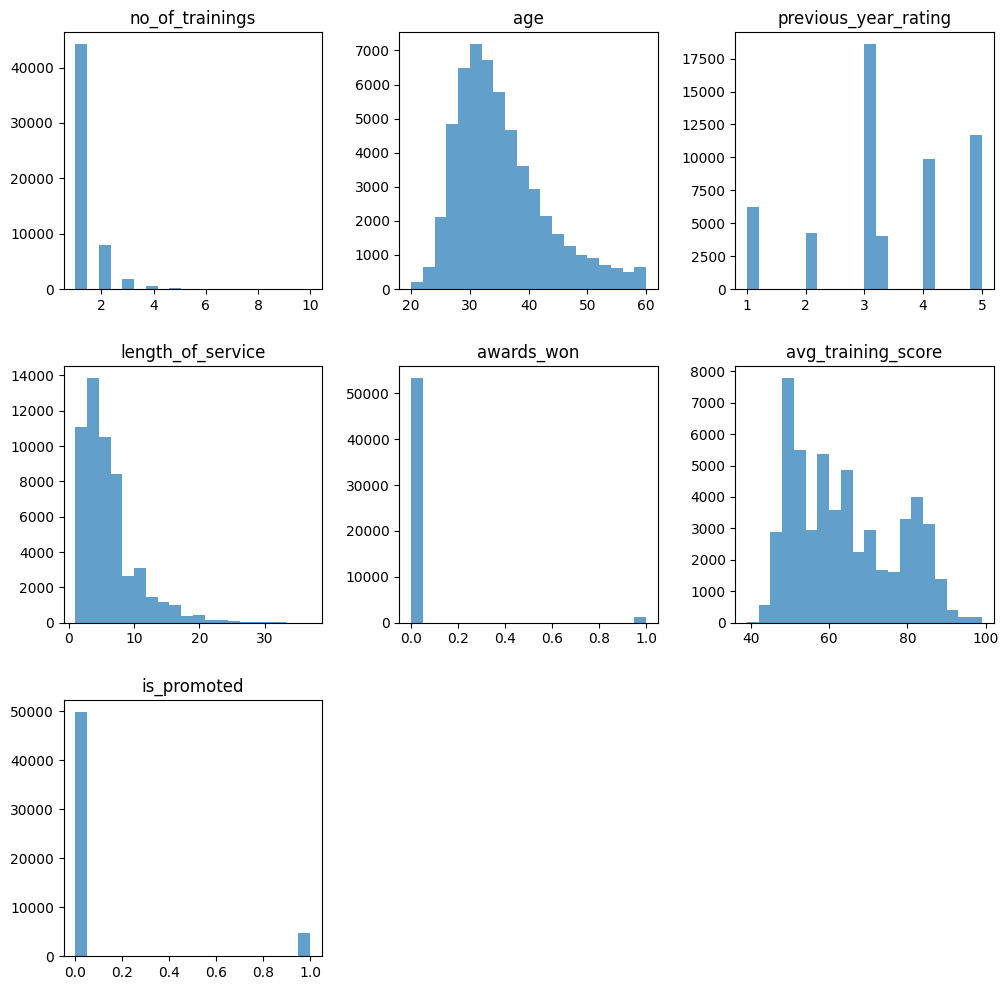

In [12]:
df.hist(figsize=(12,12), alpha=0.7, bins=20, grid=False);

**Univariate analysis of each variable can reveal the following insights:**

**`no_of_trainings`**
  - The average employee attended around 1.25 trainings, with most attending only 1. The maximum is 10, and variation is low (std: 0.61).
  - Training opportunities appear limited or untapped for most employees.

**`age`**
  - The average age is 34.8 years, with most employees between 29 and 39. The range is 20 to 60 years (std: 7.66).
  - The workforce is primarily middle-aged, suggesting a mix of experienced and mid-career employees.

**`previous_year_rating`**
  - The average rating is 3.33 (std: 1.21), with rating ranging from 1 to 5. Median is 3.
  - Most employees received rating beyond 3, with many 4-5, rating inflation might exist.

**`length_of_service`**
  - The average length of service is 5.87 years, with most employees in 3-7 years. The range is 1 to 37 years.
  - The histogram shows many employees with shorter tenures, tapering off quickly.
  - Relatively high turnover or recent hiring may explain the skew.

**`awards_won`**
  - Only 2.3% of employees won awards.
  - Awards appear to be of very low accessibility.

**`avg_training_score`**
  - The average score is 63.73 (std: 13.21), with scores ranging from 39 to 99.
  - The histogram shows a slightly bimodal distribution, with a large peak in 50–60 and small one in 70–80.
  - Moderate variation in training performance, employees perform generally less satisfying.

**`is_promoted`**
  - Only 8.5% of employees were promoted, showing promotions are limited.
  - Imbalance of class might affect model's predictive power for promotional success.

**Overall Observations**
  - Opportunities for training, awards, and promotions are limited.
  - The workforce is predominantly young or mid-career, with 3-7 lengths of service being common.
  - Performance rating and training scores indicate good overall performance rating but less satisfying training scores.


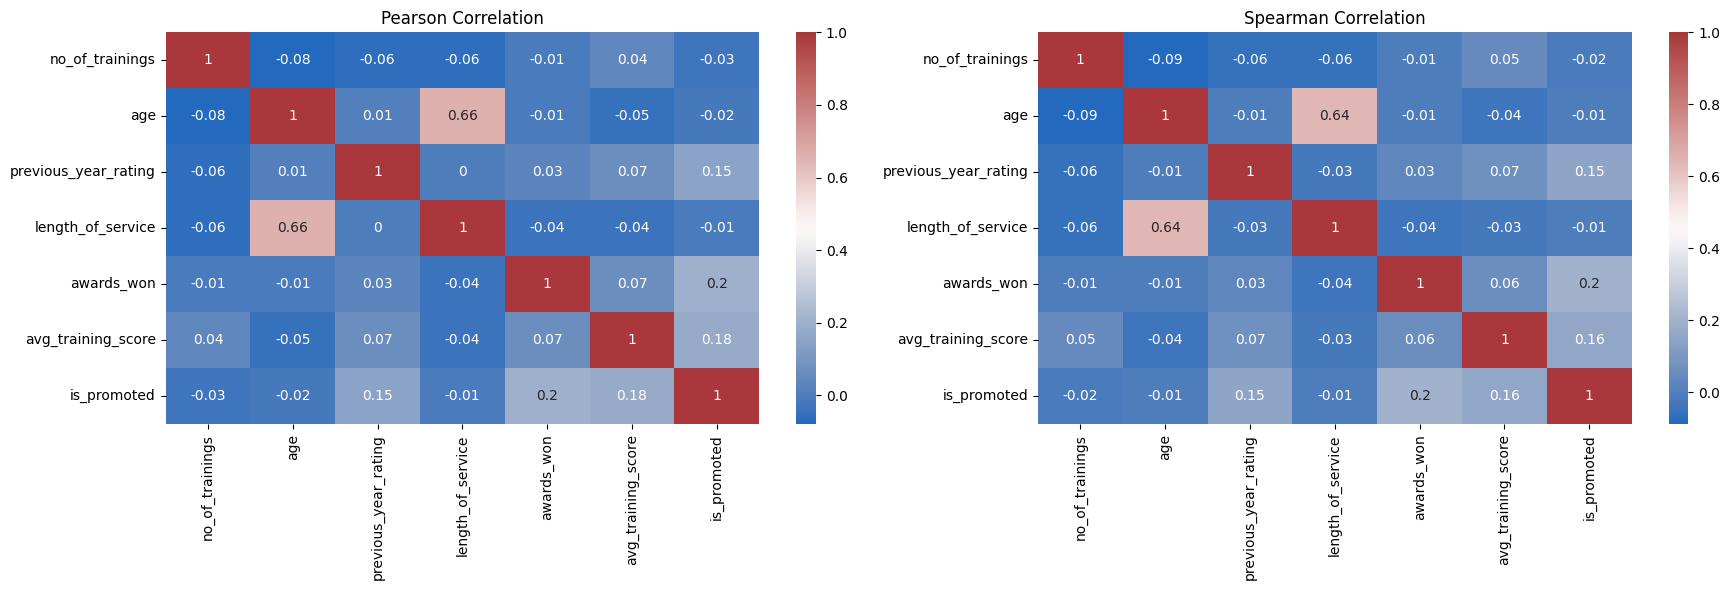

In [13]:

# Extract numerical data
numeric_data = df.select_dtypes(include=['number'])

# Set up the plotting layout
fig, axes = plt.subplots(1, 2, figsize=(18, 6))

# Pearson correlation heatmap
correlations_pearson = numeric_data.corr(method='pearson').round(2)
sns.heatmap(correlations_pearson, cmap='vlag', annot=True, ax=axes[0])
axes[0].set_title("Pearson Correlation", fontsize=12)

# Spearman correlation heatmap
correlations_spearman = numeric_data.corr(method='spearman').round(2)
sns.heatmap(correlations_spearman, cmap='vlag', annot=True, ax=axes[1])
axes[1].set_title("Spearman Correlation", fontsize=12)

plt.tight_layout()
plt.show()


**Bivariate analysis of each variable can reveal the following insights:**
- Promotions are driven by performance indicators (`previous_year_rating`, `awards_won`, and `avg_training_score`) as supported by their moderately positive pearson and spearman correlation with promotion.
- Other variables show negligible impact on promotions, linear or non-linear.
- `age` and `length_of_service` show high positive correlation as expected.

### Categorical Variable Analysis

C:\Users\stephen_yang\AppData\Local\Temp\ipykernel_21472\2595412224.py:34: UserWarning: The figure layout has changed to tight
  plt.tight_layout()


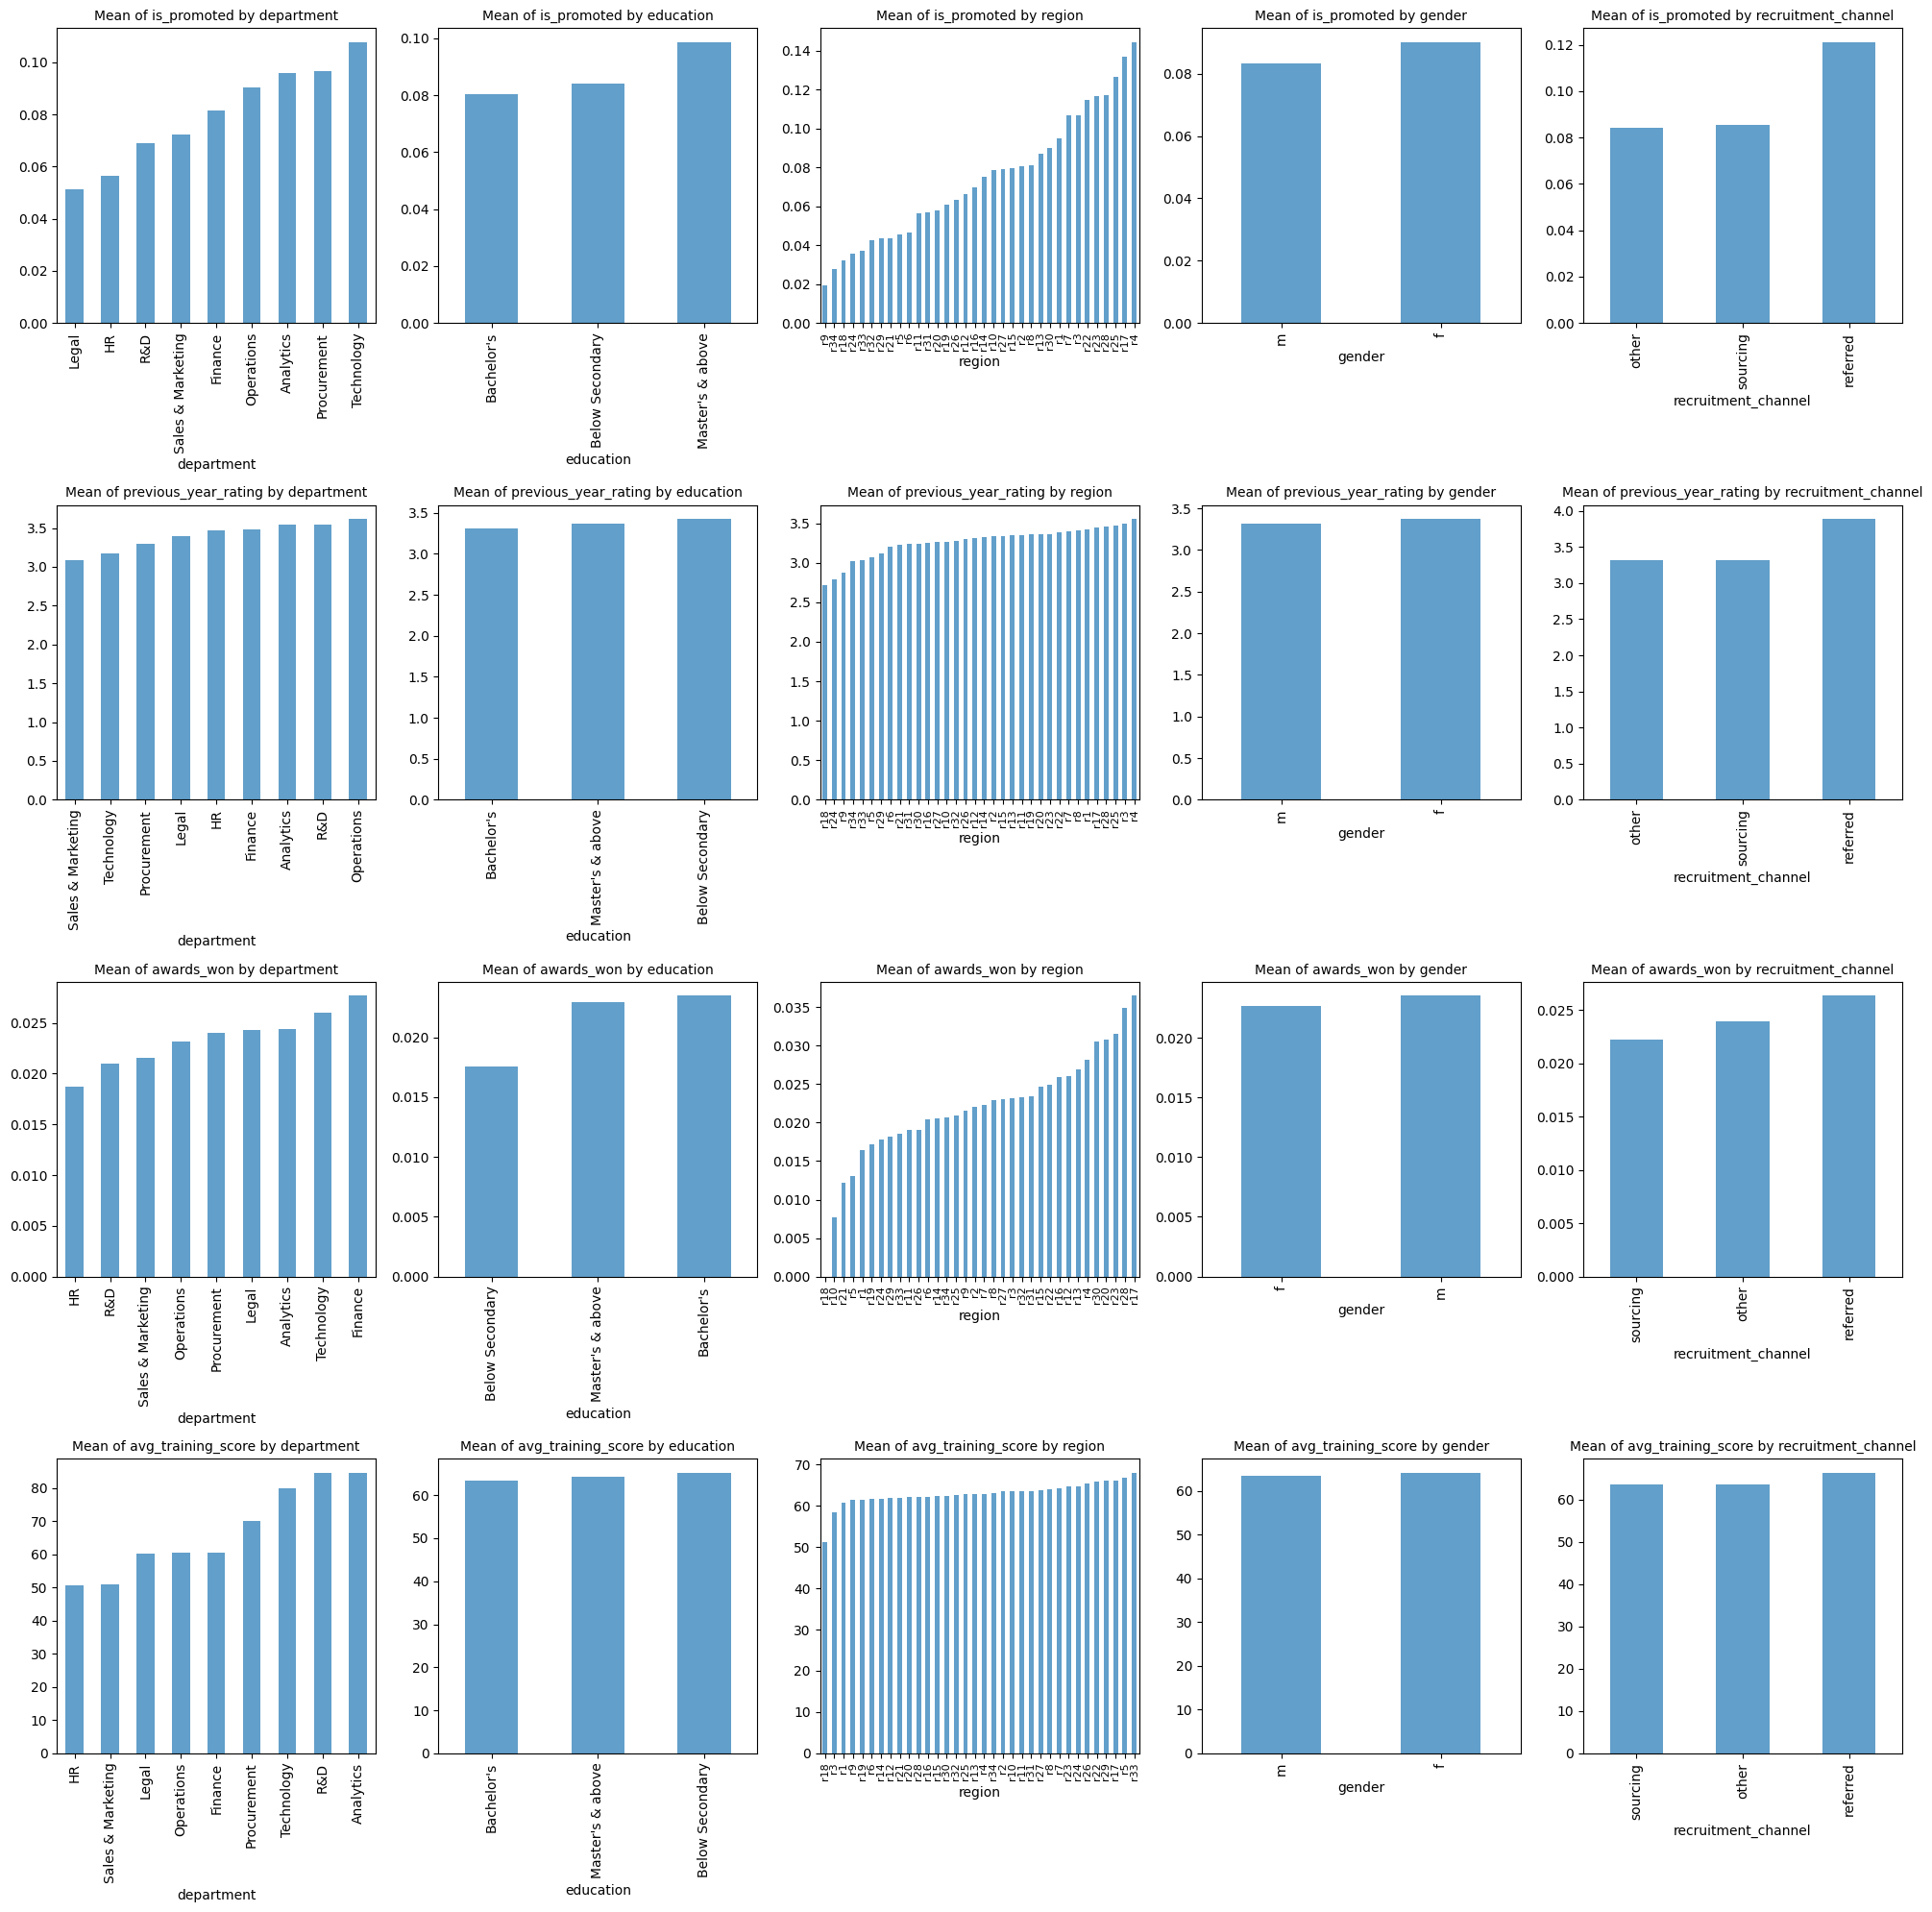

In [14]:
# Shorten the region suffix for better visualization
df['region'] = df['region'].str.replace(r'region_', 'r', regex=True)

# Create lists of categorical variables and promotion-driving numerical variables
categorical_features = ['department', 'education', 'region', 'gender', 'recruitment_channel']
impact_variables = ['is_promoted','previous_year_rating', 'awards_won', 'avg_training_score']
                   
# Assign the number of rows and columns for subplots
ncols = len(categorical_features)
nrows = len(impact_variables)

# Create a new figure
fig, axs = plt.subplots(nrows, ncols, figsize=(20, nrows*5), constrained_layout=True, sharey=False)
axs = axs.flatten()  

# Calculate mean for each numerical variable, grouped by each categorical variable
for i, num_var in enumerate(impact_variables):
    for j, cat_var in enumerate(categorical_features):
        ax = axs[i * ncols + j] 

        grouped_data = df.groupby(cat_var)[num_var].agg('mean').sort_values() # Sort by value

        # Create the bar plot
        grouped_data.plot(kind='bar', alpha=0.7, ax=ax, grid=False)
        ax.set_title(f'Mean of {num_var} by {cat_var}', fontsize=10)
        ax.set_xlabel(cat_var)
        ax.tick_params(axis='x', labelrotation=90)

        # Shrink x-axis label size only for 'region'
        if cat_var == 'region':
            ax.set_xticklabels(ax.get_xticklabels(), fontsize=8)

# Display the figure
plt.tight_layout()
plt.show()


**Analysis of promotion rate and promotion-driving numerical features across classes in different categories yield following insights:**

**`department`**
  - Significant variation in promotion rate; Procurement and Technology have the highest, Legal and HR have the lowest.
  - Average rating is consistent across departments.
  - Less significant variation in award-winning rate; Technology and Finance have the highest, HR and R&D have the lowest.
  - Significant variation in trainining score; Analytics and R&D have the highest, HR and Sales&Marketing have the lowest.

**`region`**
  - Strongest variation in promotion rate.
  - Significnat variation in award winning rate.
  - Nearly consistent in other performance metrics.

**`recruitment_channel`**
  - Referrals have significantly higher promotion rate than others.
  - Referrals also are better in all performance metrics.

**Overall Insights**
  - Employees from different regions vary drastically in promotion chance, likely partly driven by the similarly strong award-winning rate difference, aligned with previous correlation analysis. `region` can be a strong predictor.
  - Promotion rate are significantly higher in certain departments and for referrals, suggesting potential predictive power of `department` and `recruitment_channel`.
  - Performance metrics often are higher for classes with higher promotion rate, aligned with previous correlation analysis.
  - The remaining demographic variables have slight variation in promotion and performance metrics across classes, indicating low predictive power for promotion.

## Model Selection

From previous analysis, **XGBoost** is selected as the binary classification model to use, for the following characters of the data:
- **Complex Patterns:** The data set is large and with mix of numerical and categorical features. XGBoost excels in capturing complex and potentially non-linear relationships.
- **Overlapping Features:** Many features serve poorly as classifiers of promoted and non-promoted employees. XGBoost can mitigate the problem by iteratively focuses on misclassified samples.
- **Tabular Data:** XGBoost is highly optimized for tabular data.

As a backup, **Random Forest** will also be trained for its higher interpretability and relatively robust expected performance for the data.

## Pre-processing for Model Training

In [15]:
from sklearn.model_selection import train_test_split
from imblearn.over_sampling import SMOTE
from sklearn.preprocessing import StandardScaler

# Backup the dataframe
df_pre_mlprocess = df.copy(deep=True)

# Create dummies for categorical features
df = pd.get_dummies(df, columns=categorical_features)

# Convert bool to int type for future compatability
df = df.astype({col: 'int' for col in df.select_dtypes('bool').columns})
# Safety measure
df = df.fillna(0)

# Split features and target
X = df.drop(columns=['is_promoted'])
y = df['is_promoted']

# Split train and test data, use stratification to address class imbalance.
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42, stratify=y)

# Scale the data before SMOTE
scaler = StandardScaler()
X_train = scaler.fit_transform(X_train)
X_test = scaler.transform(X_test)

# Apply SMOTE to balance the training data
smote = SMOTE(sampling_strategy=0.5, random_state=42)  # Target 50% promotion data
X_train_resampled, y_train_resampled = smote.fit_resample(X_train, y_train)

# Convert numpy arrays back to DataFrames
X_train_resampled = pd.DataFrame(X_train_resampled, columns=X.columns)
X_test = pd.DataFrame(X_test, columns=X.columns)

# Handle invalid values and data types
X_train_resampled = X_train_resampled.fillna(0).apply(pd.to_numeric, errors='coerce')
X_test = X_test.fillna(0).apply(pd.to_numeric, errors='coerce')

## Model Training and Evaluation

In [16]:
from xgboost import XGBClassifier
from sklearn.model_selection import GridSearchCV

# Define parameter grid for XGBoost
param_grid_xgb = {
    'learning_rate': [0.05, 0.1],        # Step sizes for gradient updates
    'max_depth': [3, 4],                 # Tree depth
    'subsample': [0.8, 1.0],             # Fraction of samples used per boosting round
    'colsample_bytree': [0.8],           # Fraction of features used per tree
    'n_estimators': [50, 100, 200],      # Number of trees
}

# Initialize XGBoost, use ROC-AUC score for evaluation to account for class imbalance
xgb_model = XGBClassifier(objective='binary:logistic', eval_metric='auc', random_state=42)

# GridSearchCV for XGBoost
grid_search_xgb = GridSearchCV(
    estimator=xgb_model,
    param_grid=param_grid_xgb,
    scoring='roc_auc',  # Evaluate performance by ROC-AUC
    cv=3,               # 3-fold cross-validation
    n_jobs=-1           # Use all CPU cores
)

# Train and find the best model
grid_search_xgb.fit(X_train_resampled, y_train_resampled)

best_xgb_model = grid_search_xgb.best_estimator_

# Test the best model
y_pred_xgb = best_xgb_model.predict(X_test)
y_pred_xgb_prob = best_xgb_model.predict_proba(X_test)[:, 1]

In [17]:
from sklearn.ensemble import RandomForestClassifier

# Define parameter grid for Random Forest
param_grid_rf = {
    'n_estimators': [100, 200],          # Number of trees
    'max_depth': [10, 20],             # Maximum depth of trees
    'min_samples_split': [2, 5],         # Minimum samples to split a node
    'min_samples_leaf': [1, 2],           # Minimum samples per leaf node
}

# Initialize Random Forest
rf_model = RandomForestClassifier(random_state=42)

# GridSearchCV for Random Forest
grid_search_rf = GridSearchCV(
    estimator=rf_model,
    param_grid=param_grid_rf,
    scoring='roc_auc',  
    cv=3,               
    n_jobs=-1           
)

# Train and find best model
grid_search_rf.fit(X_train_resampled, y_train_resampled)

best_rf_model = grid_search_rf.best_estimator_

# Test the best model
y_pred_rf = best_rf_model.predict(X_test)
y_pred_rf_prob = best_rf_model.predict_proba(X_test)[:, 1]

In [18]:
from sklearn.metrics import classification_report, roc_auc_score, confusion_matrix
# Evaluation
print("XGBoost Classification Report:\n", classification_report(y_test, y_pred_xgb))
print("XGBoost ROC-AUC Score:", roc_auc_score(y_test, y_pred_xgb_prob))

print("Random Forest Classification Report:\n", classification_report(y_test, y_pred_rf))
print("Random Forest ROC-AUC Score:", roc_auc_score(y_test, y_pred_rf_prob))

XGBoost Classification Report:
               precision    recall  f1-score   support

           0       0.94      1.00      0.97      9985
           1       0.94      0.31      0.46       933

    accuracy                           0.94     10918
   macro avg       0.94      0.65      0.72     10918
weighted avg       0.94      0.94      0.92     10918

XGBoost ROC-AUC Score: 0.8141010014485823
Random Forest Classification Report:
               precision    recall  f1-score   support

           0       0.94      0.99      0.96      9985
           1       0.72      0.27      0.40       933

    accuracy                           0.93     10918
   macro avg       0.83      0.63      0.68     10918
weighted avg       0.92      0.93      0.91     10918

Random Forest ROC-AUC Score: 0.8011638035831883


As expected, XGBoost achieved equal or better performance in every metric. 

It has an ROC-AUC score of 0.81, indicating good discrimination between promoted and non-promoted across thresholds.

It's excellent at identifying employees who are not promoted (class 0):
- 0.94 precision: when the model predicts an employee will not be promoted, it's correct 94% of the time.
- 1 recall: All actual non-promotions are correctly identified.

However, it has mixed performance at identifying employees who are promoted (class 1):
- Despite 0.94 precision, the model only has a 0.31 recall, which indicates poor ability to identify eligble employees.
- 0.46 f1-score suggests a poor balance between precision and recall.
- The model is extremely conservative. Though employees approved by it will likely be promoted, it rarely approve employees.

The struggle in recall for minority class is common in imbalanced data, despite effort of oversampling to address the issue. More balanced real data can improve performance significantly.

## Visualize Feature Importance

d:\Miniconda\envs\datascraping\lib\site-packages\tqdm\auto.py:21: TqdmWarning: IProgress not found. Please update jupyter and ipywidgets. See https://ipywidgets.readthedocs.io/en/stable/user_install.html
  from .autonotebook import tqdm as notebook_tqdm
100%|===================| 59668/59908 [02:18<00:00]        

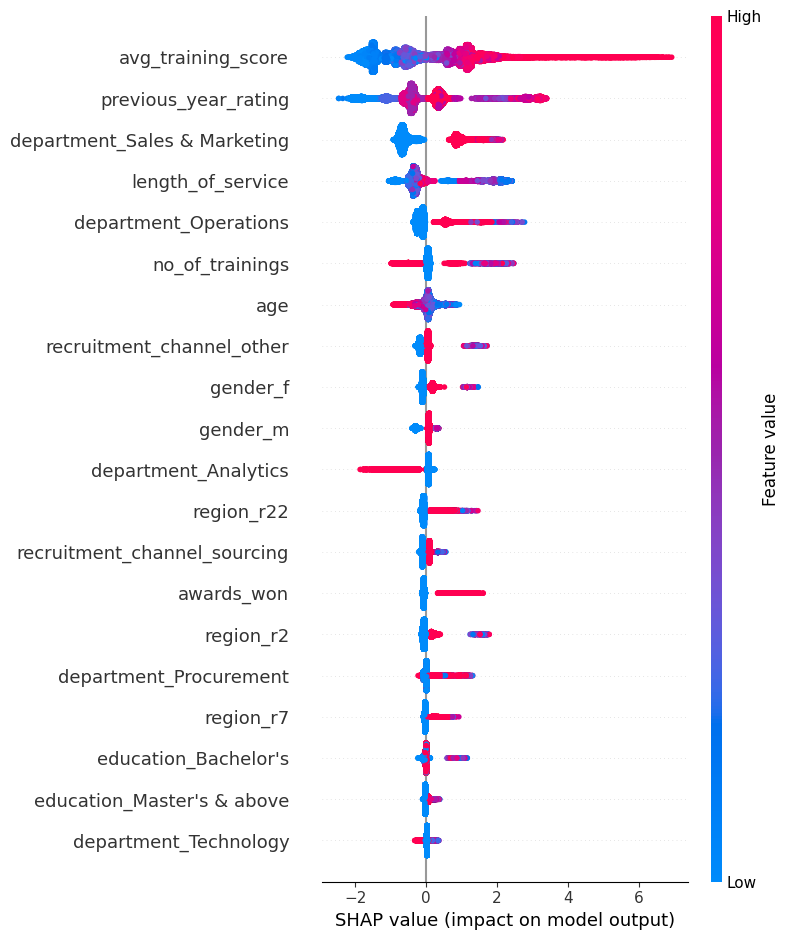

In [19]:
import shap

# Explain the predictions of the best XGBoost model using SHAP
explainer = shap.Explainer(best_xgb_model, X_train_resampled) 
shap_values = explainer(X_train_resampled)

# SHAP summary dot plot
plt.figure(figsize=(10, 6))
shap.summary_plot(shap_values, X_train_resampled, plot_type="dot", show=True)

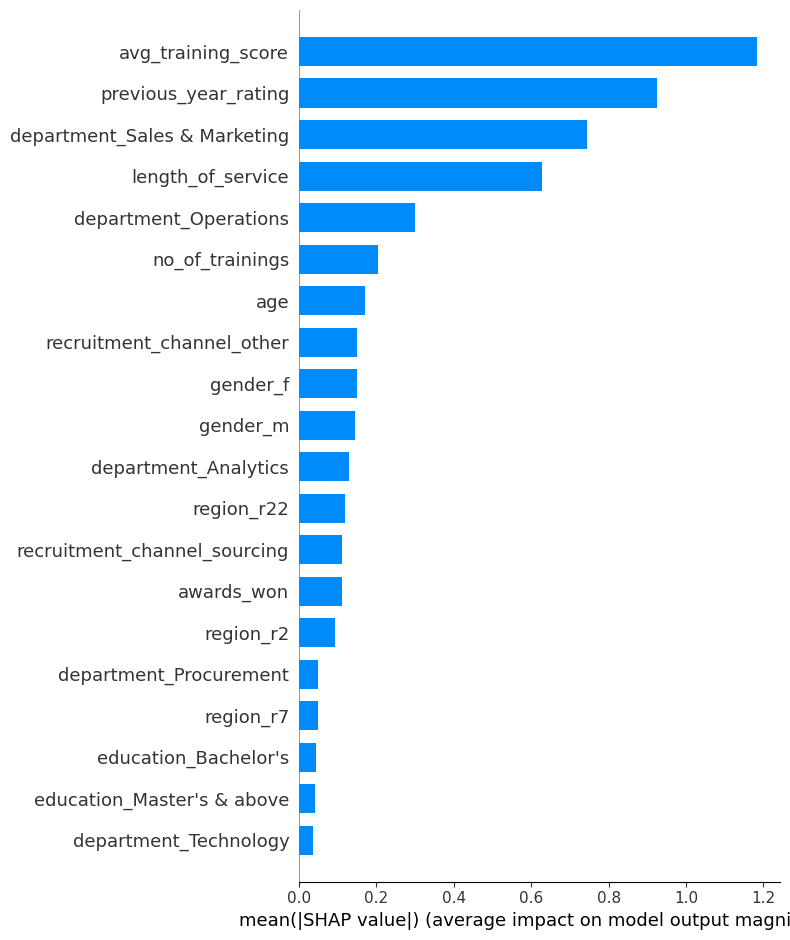

In [20]:
# SHAP summary bar plot for absolute feature importance
plt.figure(figsize=(10, 6))
shap.summary_plot(shap_values, X_train_resampled, plot_type="bar", show=True)

SHAP value represents a feature's strength and direction of impact on model's prediction. SHAP summary dot plot shows SHAP value of features of all observations, and provides an overview of feature importance in model prediction. Features are sorted by importance top-down, and features with nearly no importance are not displayed. For binary variables, red color indicates 1, blue color indicates 0. Bar plot of absolute SHAP value / feature importance is also plotted as supplement.

From the plot, the following insights can be revealed:

- `avg_training_score` and `previous_year_rating` are top two positive numerical influencers on promotions, aligned with EDA.

- `length_of_service` has mixed but significant impact on promotion. Employees with short service are generally more likely to be promoted, while employees with long service are neutrally or slightly less likely to be promoted. This trend resonotes with moderate but negative impact of `age` on promotion.

- `no_of_trainings` has moderate but mixed impact on promotion.

- `awards_won` also has moderate positive impact on promotion. While non-award winner are not less likely to be promoted, award winners are significantly more likely to be promoted, as revealed by EDA.

- `department` has high impact: being in Sales & Marketing and Operations significantly increase chance of promotion, while being in Analytics decreases chance of promotion.

- Similarly, `region` has overall low impact, but being in region 22 and 2 positively impact promotion.

- Unexpectedly, `recruitment channel` other and sourcing have moderate and mixed impact, while referred is not on the plot, maybe due to too few of referred observations.

- `gender` has moderate impact, with male employees slightly less likely to be promoted than females.

- `age` also has moderate impact, younger employees are more likely to be promoted.

## Business Recommendation

 **To help the company improve promotion process, the following recommendations can be made from previous analysis:**
 

**To forge a better candidate pool:**

- **Improve training and evaluation system**  
  - Employees with high performance metrics have significantly higher chances of promotion.  
  - Conduct an in-depth inspection and redesign of the training and evaluation system to:  
    - ensure truthful evaluation of employee performance to avoid potential rating inflation
    - develop tailored training programs where employees can better prepare for leadership roles and achieve higher scores.
  - Despite low presence, award winners are very likely to be promoted, research into their reasons for promotion might be helpful.

- **Reduce categorical discrepancies**  
  - Investigate the reasons behind differences in promotion chances across various categories (age, departments, recruit channels etc.)
  - Take proactive measures to prevent unintended biases.


**To quickly and reliably identify eligible candidates:**

- **Use XGBoost Model for short-Listing eligible employees**  
  - The current model has high precision and low recall for identifying eligible candidates.  
  - The list of candidates filtered by the model is reliable but may be too short to fulfill all needs. Nonetheless, the model should be deployed with confidence.  
  - As mentioned before, acquiring more data input from promoted employees can significantly improve the model's performance. Steps should be taken to obtain such data.
